In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D,MaxPooling2D,Flatten, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from sklearn.model_selection import train_test_split

import keras

(54000, 28, 28, 1)

In [72]:
(X_train, y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train/255
X_test = X_test/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1)

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (28,28,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 3136)              0         
                                                                 
 dense_36 (Dense)            (None, 128)             

In [70]:
keras.utils.plot_model(model, show_dtype= True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [73]:
model.compile(loss = 'sparse_categorical_crossentropy',  optimizer = 'adam', metrics='accuracy')

modelpath = './data/model/fashon_mnist_best_model_2.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

#10 번이상 성능이 향상되지 않으면 중단.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15)
history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs = 10000, batch_size = 600, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

ValueError: in user code:

    File "c:\Users\box15\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "c:\Users\box15\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(6000,) and logits.shape=(600, 10)


In [26]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.9123


[0.3394252061843872, 0.9122999906539917]

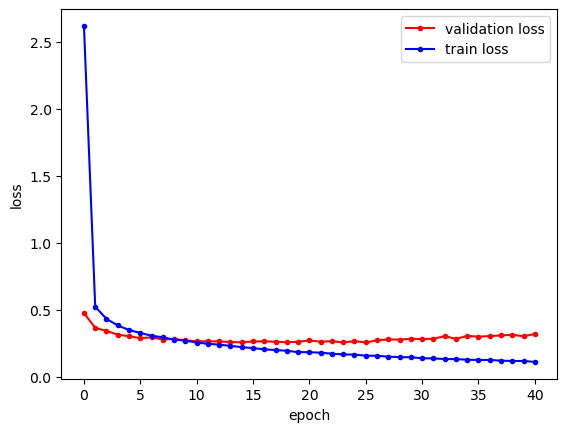

In [28]:
# validation loss
y_vloss = history.history['val_loss']

# train loss
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [33]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [78]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

X_train = X_train/255
X_test = X_test/255

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1)

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (32,32,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',  optimizer = 'adam', metrics='accuracy')
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 4096)              0         
                                                                 
 dense_40 (Dense)            (None, 128)             

In [85]:
print(y_train) # type: ignore

[[2]
 [4]
 [0]
 ...
 [5]
 [7]
 [8]]


In [86]:
modelpath = './data/model/cifar10_best_model_2.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15)
history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs = 10000, batch_size = 1000, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 1.63613, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 2: val_loss improved from 1.63613 to 1.44855, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 3: val_loss improved from 1.44855 to 1.33241, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 4: val_loss improved from 1.33241 to 1.25442, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 5: val_loss improved from 1.25442 to 1.21109, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 6: val_loss improved from 1.21109 to 1.16859, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 7: val_loss improved from 1.16859 to 1.12746, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 8: val_loss improved from 1.12746 to 1.08828, saving model to ./data/model\cifar10_best_model_2.hdf5

Epoch 9: val_loss did not improve from 1.08828

Epoch 10: val_loss improved from 1.08828 to 1.05272, saving model to ./data/model\cifar10_b

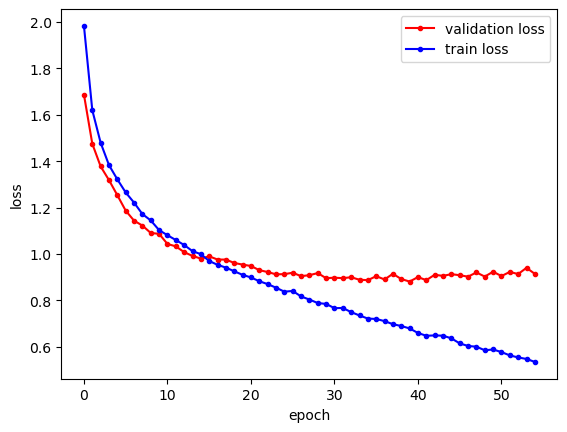

In [61]:
# validation loss
y_vloss = history.history['val_loss']

# train loss
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
(X_train, y_train), (X_test,y_test) = keras.datasets.imdb.load_data(num_words= 300)



In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train,maxlen = 100, truncating = 'pre')
X_test = pad_sequences(X_test,maxlen = 100, truncating = 'pre')

X_train = to_categorical(X_train)
X_test = to_categorical(X_test)


In [14]:
model = Sequential()
model.add(SimpleRNN(8, input_shape = (100,300)))
model.add(Dense(2,activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',  optimizer = 'adam', metrics='accuracy')

modelpath = './data/model/words_best_model_2.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model.fit(X_train, y_train,validation_split = 0.25, epochs = 10000, batch_size = 500, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.69273, saving model to ./data/model\words_best_model_2.hdf5

Epoch 2: val_loss improved from 0.69273 to 0.68591, saving model to ./data/model\words_best_model_2.hdf5

Epoch 3: val_loss improved from 0.68591 to 0.63593, saving model to ./data/model\words_best_model_2.hdf5

Epoch 4: val_loss improved from 0.63593 to 0.61110, saving model to ./data/model\words_best_model_2.hdf5

Epoch 5: val_loss improved from 0.61110 to 0.57541, saving model to ./data/model\words_best_model_2.hdf5

Epoch 6: val_loss improved from 0.57541 to 0.56134, saving model to ./data/model\words_best_model_2.hdf5

Epoch 7: val_loss did not improve from 0.56134

Epoch 8: val_loss improved from 0.56134 to 0.54471, saving model to ./data/model\words_best_model_2.hdf5

Epoch 9: val_loss improved from 0.54471 to 0.54036, saving model to ./data/model\words_best_model_2.hdf5

Epoch 10: val_loss improved from 0.54036 to 0.53752, saving model to ./data/model\words_best_model_2.hdf5



InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.